Libraries and Style Files
-------------------------

In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#For displaying .pdfs 
from IPython.display import IFrame

def display_pdf(pdf_path, width="100%", height="600px"):
    """Displays a PDF file within a Jupyter Notebook cell."""
    return IFrame(src=pdf_path, width=width, height=height)

#Print text file with colored line numbers
from colored import Fore, Back, Style, fore, back, style, attr

def display_file_with_colored_line_numbers(filepath, color=Fore.red):
    """
    Displays a text file with colored line numbers in a Jupyter Notebook.
    """
    try:
        with open(filepath, 'r') as f:
            for i, line in enumerate(f, 1):
                colored_line_num = f"{color}{i:4d}{attr(0)}{Style.reset}"  # Format line number
                print(f"{colored_line_num}: {line.rstrip()}") # Print line number and content
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")

#general libraries used
import numpy as np
import pandas as pd


Using SOURCES 4A (modified) to Estimate Radiogenic Neutron Sources
==================================================================

SOURCES is a computational code that takes levels of radioactive contamination in materials and outputs the neutron source strengths they induce in terms of ($\alpha$,n) and spontaneous fission (SF). The Radiation Safety Information Computational Center (RSICC)[[RSICC][RSICC]] maintains and distributes the SOURCES code. SOURCES has two released versions, first, SOURCES4A and then later SOURCES4C. The earlier version, SOURCES4A, has been usefully modified by Vitaly Kudryavtsev of Sheffield University [[SOURCES4Amod][SOURCES4Amod]] and is the preferred version for the rare-event/underground physics community [[Radiogenic Backgrounds][RADIOGENIC]].

[RADIOGENIC]: https://www.sciencedirect.com/science/article/pii/S0168900217312263?ref=pdf_download&fr=RR-2&rr=954f718d3d727b15 "SOURCES reference in underground physics/dark matter"
[RSICC]: https://www.ornl.gov/onramp/rsicc "Oak Ridge Computational Page"
[SOURCES4Amod]: https://www.sciencedirect.com/science/article/pii/S0168900220305088?via%3Dihub "Kudryavtsev modified SOURCES4A"

SOURCES4A (modified) Input Files
---------------------------------

The manual for SOURCES4A is attached below (in a collapsed output cell after the `display_pdf` excecution). Pages 26-30 show the input file specification for the so-called "homogeneous problem." A further sample problem--for characterizing a Pu/Be source--is shown on pg. 46. We will use the "homogeneous problem" case; a block of material has radioactive "sources" (isotopes) throughout it which can decay by SF or $\alpha$. The SF decays directly produce neutrons and the $\alpha$ decays find other "targets" on which to do ($\alpha$,n).

In [2]:
%%capture
display_pdf('SOURCES_manuals/SOURCES4A_manual.pdf')

The SOURCES4A (mod) input for 1 part per billion (ppb) of $^{232}$Th chain contamination is shown below. There are three stanzas that are relevant to our problem. 

The walls around our area in SNOLAB are made of "shotcrete" that is laid over the norite rock. The material composition of said is given in the SNOLAB Users Handbook (v2) [] and a separate SNOLAB report [SNOLAB-STR-2007-003]. This information makes up the first stanza starting on line 4 below and ending on line 14. In that stanza the leftmost numbers represent the atomic number (Z) of the elemental constituent of the bulk material; the rightmost numbers represent the **atom fraction** of each of those constituents. The sum of the atom fractions should be 1. The reference for the shotcrete composition is an internal SNOLAB document [SNOLAB-STR-2007-003]. The relevant table is reproduced below.

![Shotcrete](SOURCES_images/shotcrete_comp.png "Shotcrete Composition")

The `.pdf` file is for the SNOLAB document [SNOLAB-STR-2007-003] is in a collapsed cell below.

In [3]:
%%capture
display_pdf('SNOLAB_docs/SNOLAB-STR-2007-003-NoriteRock-Radioactivity.pdf')

The second stanza (lines 17 to 23 below) lists the specific radioactive isotopes that contaminate the material that we are simulating. The notebook in this directory `A-Decay-Chain-Modeling.ipynb` gives the details of finding the expected ratios of various radioactive isotopes given the assumption of **secular equilibrium**. The numbers on the leftmost side in this stanza encode the isotope number in the form atomic number (Z) times 10,000 plus mass number (A) times 10. For example $^{212}$Bi is encoded as `832120`. The rightmost number is the concentration of said radioactive isotopes in atoms/cm$^3$. Note that these isotopic concentrations are scaled to what is expected from 1 ppb of the parent in the chain, in this case, $^{232}$Th.

The third stanza (lines 25 to 48 below) lists the so-called "target" atoms. These are all potential isotopes present that can participate in ($\alpha$,n) reactions with alphas that are emitted from the radioactive isotopes that contaminate the material (stanza 2). Generally, these include all of the isotopes of the elements specified in stanza 1. In stanza 1 it was only important to specify the atomic number (Z) of the elements because that information is used to calculate how $\alpha$ particles slow down in the medium. In stanza 3 we must specify all the **specific** isotopes that those elements have. The details of the ($\alpha$,n) reaction depend on those specific isotopes, not just the elements. The isotopes included in stanza 3 will be all the stable isotopes of each element in stanza 1 with non-negligible isotopic abundances. Stanza 3 specifies each isotope with the leftmost number in the same format as stanza 2. The rightmost number is again the isotopic concentrations in atoms/cm$^3$. 

Below we show the three input files used for SOURCES4A (mod). The $^{232}$Th input text file is always shown but the uranium files are hidden by default. 

In [4]:
display_file_with_colored_line_numbers('SOURCES_inputs/tape1-Th232-SNOLAB-1ppb',Fore.blue)

   1: Bulk Shotcrete problem 1ppb Th-232 in secular equilibrium
   2: 1 2 1
   3: 11 0
   4:  1   0.008369383
   5:  6   0.000702273
   6:  8   0.632664473
   7:  11  0.020638254
   8:  12  0.010237913
   9:  13  0.04720579
  10:  14  0.209482183
  11:  19  0.009492483
  12:  20  0.0501958
  13:  25  0.001420213
  14:  26  0.009591234
  15: 100 10.0 0.0
  16: 7
  17:  832120  5.201803E+00
  18:  842120  2.728439E-10
  19:  842160  2.073918E-04
  20:  862200  7.942659E-02
  21:  882240  4.469156E+02
  22:  902280  8.610849E+04
  23:  902320  6.346190E+14
  24: 24 4000
  25:  60130  8.989e-6
  26:  80170  2.426e-4
  27:  80180  1.294e-3
  28:  110230 2.064e-2
  29:  120240 8.084e-3
  30:  120250 1.025e-3
  31:  120260 1.129e-3
  32:  130270 4.721e-2
  33:  140280 1.933e-1
  34:  140290 9.787e-3
  35:  140300 6.438e-3
  36:  190390 8.853e-3
  37:  190400 1.111e-6
  38:  190410 6.389e-4
  39:  200420 3.248e-4
  40:  200430 6.776e-5
  41:  200440 1.047e-3
  42:  200460 2.008e-6
  43:  20048

In [5]:
%%capture
display_file_with_colored_line_numbers('SOURCES_inputs/tape1-U238-SNOLAB-1ppb',Fore.blue)

In [6]:
%%capture
display_file_with_colored_line_numbers('SOURCES_inputs/tape1-U235-SNOLAB-1ppb',Fore.blue)

SOURCES4A (modified) Output
---------------------------

The raw SOURCES4A (mod) output is given in a text file called "tape7." The print commands below are commented out. If the content is needed either uncomment and run the command or navagate to the relevant text file in this directory. The files are long, so viewing them in a separate text editor may be best. 

In [7]:
%%capture
display_file_with_colored_line_numbers('SOURCES_outputs/tape1-Th232-SNOLAB-1ppb_tape7',Fore.blue)
#display_file_with_colored_line_numbers('SOURCES_outputs/tape1-U238-SNOLAB-1ppb_tape7',Fore.blue)
#display_file_with_colored_line_numbers('SOURCES_outputs/tape1-U235-SNOLAB-1ppb_tape7',Fore.blue)

The raw SOURCES4A (mod) output is converted into a simpler form in the files `data/XXYYY_summary_1ppb_250609.txt` and read into a standard `pandas` data structure. In the data structure as read in below we can see the energy bins for each neutron source bin in units of MeV. Furthermore the source strengths in the three right columns are in units of neutrons/cm$^3$/s and broken out by the ($\alpha$,n) contribution, the spontaneous fission (SF) contribution, and the total. 

In [8]:
th232_chain = pd.read_csv("data/Th232_summary_1ppb_250609.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         sep='\s+')
print (th232_chain.head(10))

   Energy           a,n          S.F.         Total
0    10.0  1.407000e-14  1.576000e-19  1.407000e-14
1     9.9  1.554000e-14  1.779000e-19  1.554000e-14
2     9.8  1.708000e-14  2.019000e-19  1.708000e-14
3     9.7  1.867000e-14  2.289000e-19  1.867000e-14
4     9.6  2.033000e-14  2.575000e-19  2.033000e-14
5     9.5  2.204000e-14  2.922000e-19  2.204000e-14
6     9.4  2.461000e-14  3.291000e-19  2.461000e-14
7     9.2  4.001000e-14  4.207000e-19  4.001000e-14
8     9.1  4.952000e-14  4.753000e-19  4.952000e-14
9     9.0  5.942000e-14  5.364000e-19  5.942000e-14


Below we change the data over to `numpy` arrays and set up for plotting in `matplotlib`. 

In [12]:
th232chainEn = np.asarray(th232_chain['Energy'],dtype=float)
th232chainRn = np.asarray(th232_chain['Total'],dtype=float)
th232chainANRn = np.asarray(th232_chain['a,n'],dtype=float)
th232chainSFRn = np.asarray(th232_chain['S.F.'],dtype=float)

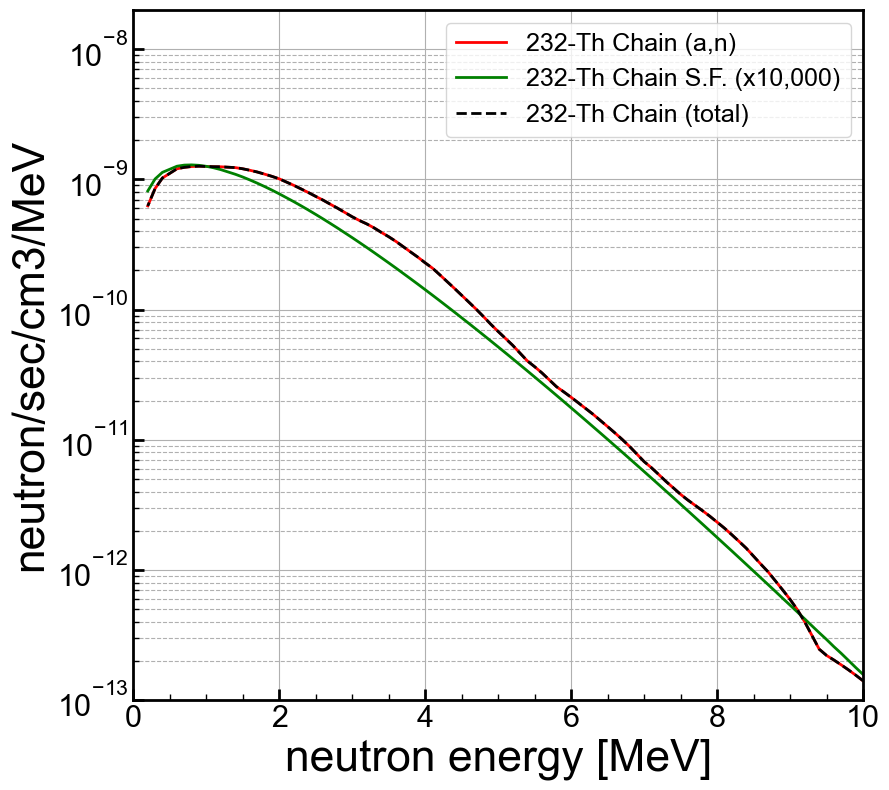

In [21]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(th232chainEn)[0])


ax1.plot(th232chainEn, th232chainANRn/width,color='r',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(th232chainEn, 100000*th232chainSFRn/width,color='g',linestyle='-',label="232-Th Chain S.F. (x10,000)")
ax1.plot(th232chainEn, th232chainRn/width,color='k',linestyle='--',label="232-Th Chain (total)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

The output plot shows that for $^{232}$Th the ($\alpha$,n) contribution is dominant. The spontaneous fission contribution needs to be scaled by a factor of 10,000 to be close to the same contribution. 

Below we do the same plot for the uranium contributions. $^{238}$U and $^{235}$U are not considered to be independent contributions. $^{238}$U is naturally present at 99.27% and $^{235}$U is present at 0.72%. So, when we plot 1ppb of uranium we distribute it between the isotopes in this ratio. 

In [24]:
%%capture
u238_chain = pd.read_csv("data/U238_summary_1ppb_250609.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u238_chain.head(10))

u235_chain = pd.read_csv("data/U235_summary_1ppb_250609.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (u235_chain_hang.head(10))


In [31]:
u238_frac=0.9927
u235_frac=0.0072

u238chainEn = np.asarray(u238_chain['Energy'],dtype=float)
u238chainRn = np.asarray(u238_frac*u238_chain['Total'],dtype=float)
u238chainANRn = np.asarray(u238_frac*u238_chain['a,n'],dtype=float)
u238chainSFRn = np.asarray(u238_frac*u238_chain['S.F.'],dtype=float)

u235chainEn = np.asarray(u235_chain['Energy'],dtype=float)
u235chainRn = np.asarray(u235_frac*u235_chain['Total'],dtype=float)
u235chainANRn = np.asarray(u235_frac*u235_chain['a,n'],dtype=float)
u235chainSFRn = np.asarray(u235_frac*u235_chain['S.F.'],dtype=float)

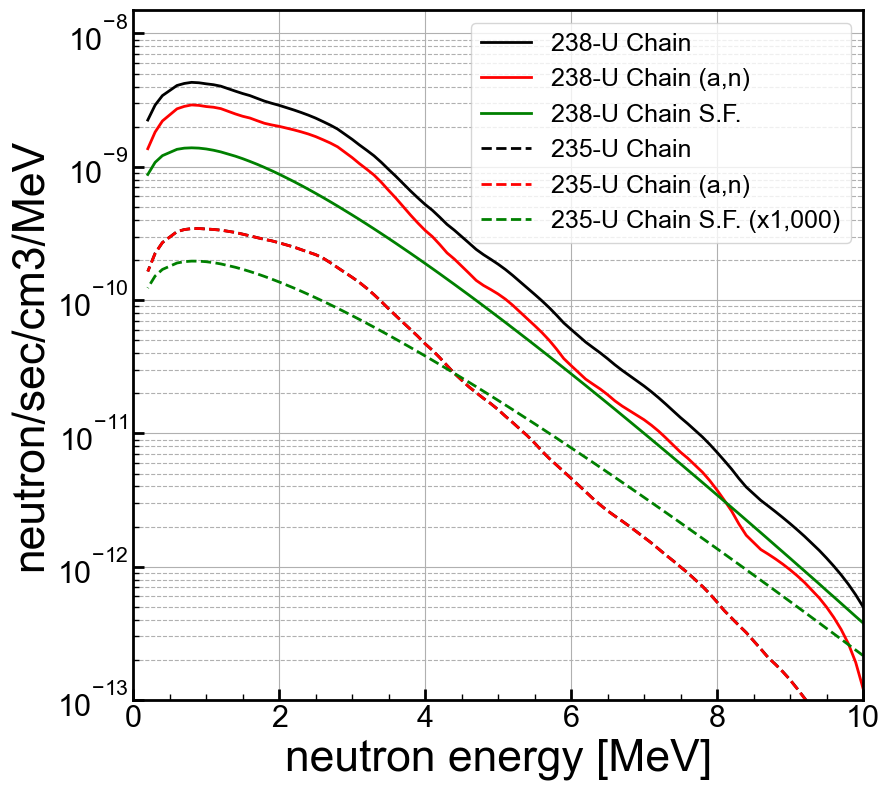

In [33]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238chainEn)[0])
      

ax1.plot(u238chainEn, u238chainRn/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")

ax1.plot(u235chainEn, u235chainRn/width,color='k',linestyle='--',label="235-U Chain")
ax1.plot(u235chainEn, u235chainANRn/width,color='r',linestyle='--',label="235-U Chain (a,n)")
ax1.plot(u235chainEn, 1000*u235chainSFRn/width,color='g',linestyle='--',label="235-U Chain S.F. (x1,000)")

ymin = 1e-13
ymax = 1.5e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.show()

Total Source Strengths
----------------------

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.abs(np.diff(u235chainEn)[0])



ax1.plot(u235chainEn, u235chainRn/width,color='k',linestyle='-',label="235-U Chain")
ax1.plot(u235chainEn, u235chainANRn/width,color='r',linestyle='-',label="235-U Chain (a,n)")
ax1.plot(u235chainEn, u235chainSFRn/width,color='g',linestyle='-',label="235-U Chain S.F.")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-7


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
#test with SOURCES manual example
pube = pd.read_csv("data/raw_sources_IO/PuBe_summary.txt", skiprows=1, engine='python', names=['Energy','a,n','S.F.','Total'], \
                         delim_whitespace=True)
print (pube.head(10))

In [ ]:
pubeEn = np.asarray(pube['Energy'],dtype=float)
pubeRn = np.asarray(pube['Total'],dtype=float)
pubeANRn = np.asarray(pube['a,n'],dtype=float)
pubeSFRn = np.asarray(pube['S.F.'],dtype=float)

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

width=np.abs(np.diff(pubeEn)[0])



ax1.plot(pubeEn, pubeRn,color='k',linestyle='-',label="PuBe Source")
ax1.plot(pubeEn, pubeANRn,color='r',linestyle='-',label="PuBe Source (a,n)")




#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 1.6e4


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 14) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
# functions

def integrate_df(df):
    # (left-sided rectangular integral)
    dE = -df['E'].diff(periods = -1)
    dE.iat[-1] = dE.iat[-2]
    A = df['spec']*dE
    return A.sum()

def maxwell(E, B):
    # height of Maxwell distribution for energy E (eV) and temperature T (K) related to B via B = 1/kT
    return 2*B*np.sqrt(B*E/np.pi)*np.exp(-B*E)

In [ ]:
spec = pd.DataFrame()
spec['E']=th232hangEn
spec['spec']=th232hangRn
print(integrate_df(spec))

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])
widthHR=np.abs(np.diff(th232chainEn_HangRetry)[0])

print(width)
print(widthHR)



ax1.plot(th232chainEn, th232chainANRn_HangRetry/widthHR,color='r',linestyle='--',label="Hang Retry: 232-Th Chain (a,n)")
ax1.plot(th232hangEn, th232hangRn,color='m',linestyle='--',label="232-Th Chain (Hang)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(u238chainEn)[0])
widthH=np.max(np.diff(uANhangEn))
print(np.max(uANhangRn))
      


ax1.plot(u238chainEn, (u238chainANRn+u238chainSFRn)/width,color='k',linestyle='-',label="238-U Chain")
ax1.plot(u238chainEn, u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
#ax1.plot(uANhangEn, uANhangRn+uSFhangRn,color='r',linestyle='--',label="U Chain (a,n) (Hang)")
ax1.plot(uANhangEn, uANhangRn,color='r',linestyle='--',label="U Chain (a,n) (Hang)")
ax1.plot(uSFhangEn, uSFhangRn,color='g',linestyle='--',label="U Chain S.F. (Hang)")
ax1.plot(uANhangEn, uANhangRn*100,color='m',linestyle='--',label="U Chain (a,n) (Hang)(x 100)")
ax1.plot(uSFhangEn, uSFhangRn*100,color='c',linestyle='--',label="U Chain S.F. (Hang)(x 100)")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 1e-7


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 10) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
spec = pd.DataFrame()
spec['E']=uANhangEn
spec['spec']=uANhangRn
print(integrate_df(spec))

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

print(th232chainRn)

width=np.abs(np.diff(th232chainEn)[0])
widthH=np.abs(np.diff(th232hangEn)[0])
widthHR=np.abs(np.diff(th232chainEn_HangRetry)[0])

print(width)
print(widthHR)

jac = 1/(th232chainEn*np.log(10))

#multiply thorium by 5 because thorium seems to be 5x greater concentration:
#https://confluence.slac.stanford.edu/pages/viewpage.action?spaceKey=NEXUS&title=Model+Neutron+Spectrum&preview=/160010006/160139384/SNOLAB-STR-2007-003-NoriteRock-Radioactivity.pdf
ax1.plot(th232chainEn, 5*jac*th232chainANRn/width,color='y',linestyle='-',label="232-Th Chain (a,n)")
ax1.plot(u238chainEn, jac*u238chainANRn/width,color='r',linestyle='-',label="238-U Chain (a,n)")
ax1.plot(u238chainEn, jac*u238chainSFRn/width,color='g',linestyle='-',label="238-U Chain S.F.")
ax1.plot(th232chainEn, jac*(5*th232chainANRn+u238chainANRn+u238chainSFRn)/width,color='k',linestyle='-',label="Total")

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-13
ymax = 2e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.01, 30) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':18})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
th232_SuperSim = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_Th_1ppb.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (th232_SuperSim.head(10))

th232_SuperSimAN = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_Th_Alpha_1ppb.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (th232_SuperSimAN.head(10))

u_SuperSim = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_U_1ppb.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (u_SuperSim.head(10))

u_SuperSimAN = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_U_Alpha_1ppb.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (u_SuperSimAN.head(10))

u_SuperSimSF = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_U_SF_1ppb.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (u_SuperSimSF.head(10))

In [ ]:
Th232SuperSimEn = np.asarray(th232_SuperSim['Energy'],dtype=float)
Th232SuperSimRn = np.asarray(th232_SuperSim['Total'],dtype=float)

Th232SuperSimANEn = np.asarray(th232_SuperSimAN['Energy'],dtype=float)
Th232SuperSimANRn = np.asarray(th232_SuperSimAN['Total'],dtype=float)

USuperSimEn = np.asarray(u_SuperSim['Energy'],dtype=float)
USuperSimRn = np.asarray(u_SuperSim['Total'],dtype=float)
USuperSimANRn = np.asarray(u_SuperSimAN['Total'],dtype=float)
USuperSimSFRn = np.asarray(u_SuperSimSF['Total'],dtype=float)

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(Th232SuperSimEn)[0])
widthu=np.abs(np.diff(USuperSimEn)[0])

      



ax1.plot(Th232SuperSimANEn, Th232SuperSimANRn/width,color='r',linestyle='--',label="232-Th SuperSim (a,n)")
ax1.plot(Th232SuperSimEn, Th232SuperSimRn/width,color='k',linestyle=':',label="232-Th SuperSim")
ax1.plot(USuperSimEn, USuperSimANRn/widthu,color='r',linestyle='-',label="U SuperSim (a,n)")
ax1.plot(USuperSimEn, USuperSimSFRn/widthu,color='g',linestyle='-',label="U SuperSim SF")
ax1.plot(USuperSimEn, USuperSimRn/widthu,color='k',linestyle='-',label="U SuperSim Total")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 1e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 14) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
th232_SuperSim_old = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_Th_1ppb_old.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (th232_SuperSim_old.head(10))

th232_SuperSimAN_old = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_Th_Alpha_1ppb_old.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (th232_SuperSimAN_old.head(10))

u_SuperSim_old = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_U_1ppb_old.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (u_SuperSim.head(10))

u_SuperSimAN_old = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_U_Alpha_1ppb_old.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (u_SuperSimAN.head(10))

u_SuperSimSF_old = pd.read_csv("data/raw_sources_IO/SuperSim_LAB_U_SF_1ppb_old.dat", skiprows=1, engine='python', names=['Energy','Total'], \
                         sep='\s+')
print (u_SuperSimSF.head(10))

In [ ]:
Th232SuperSimEn_old = np.asarray(th232_SuperSim_old['Energy'],dtype=float)
Th232SuperSimRn_old = np.asarray(th232_SuperSim_old['Total'],dtype=float)

Th232SuperSimANEn_old = np.asarray(th232_SuperSimAN_old['Energy'],dtype=float)
Th232SuperSimANRn_old = np.asarray(th232_SuperSimAN_old['Total'],dtype=float)

USuperSimEn_old = np.asarray(u_SuperSim_old['Energy'],dtype=float)
USuperSimRn_old = np.asarray(u_SuperSim_old['Total'],dtype=float)
USuperSimANRn_old = np.asarray(u_SuperSimAN_old['Total'],dtype=float)
USuperSimSFRn_old = np.asarray(u_SuperSimSF_old['Total'],dtype=float)

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


width=np.abs(np.diff(Th232SuperSimEn_old)[0])
widthu=np.abs(np.diff(USuperSimEn_old)[0])

      



ax1.plot(Th232SuperSimANEn_old, Th232SuperSimANRn_old/width,color='r',linestyle='--',label="232-Th SuperSim (a,n)")
ax1.plot(Th232SuperSimEn_old, Th232SuperSimRn_old/width,color='k',linestyle=':',label="232-Th SuperSim")
ax1.plot(USuperSimEn_old, USuperSimANRn_old/widthu,color='r',linestyle='-',label="U SuperSim (a,n)")
ax1.plot(USuperSimEn_old, USuperSimSFRn_old/widthu,color='g',linestyle='-',label="U SuperSim SF")
ax1.plot(USuperSimEn_old, USuperSimRn_old/widthu,color='k',linestyle='-',label="U SuperSim Total")



#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-14
ymax = 1e-8


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 14) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'neutron energy [MeV]')
ax1.set_ylabel('neutron/sec/cm3/MeV')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':12})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()